In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

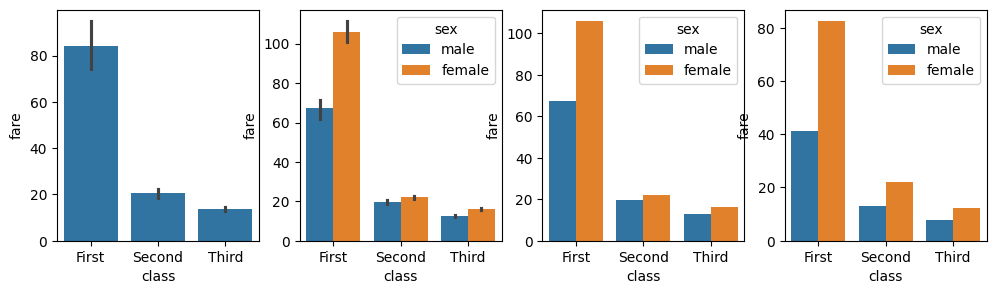

In [14]:
df = sns.load_dataset('titanic')

# barplot : Show point estimates and errors as rectangular bars.
# 범주형 데이터별로 집계(statistical aggregate, default: mean) 값을 막대(bar)로 표현
# defaults: estimator='mean', errorbar=(ci, 95)
plt.figure(figsize=(12,3))
plt.subplot(1,4,1)
sns.barplot(x='class', y='fare', data=df)
plt.subplot(1,4,2)
sns.barplot(x='class', y='fare', hue='sex', data=df, errorbar=('ci', 50))
plt.subplot(1,4,3)
sns.barplot(x='class', y='fare', hue='sex', data=df, errorbar=None)
plt.subplot(1,4,4)
sns.barplot(x='class', y='fare', hue='sex', data=df, errorbar=None, estimator='median')
plt.show()
plt.close()

In [25]:
print(df.select_dtypes(include=['object']).columns.tolist())
print(df.select_dtypes(include=['number']).columns.tolist())

['sex', 'embarked', 'who', 'embark_town', 'alive']
['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']


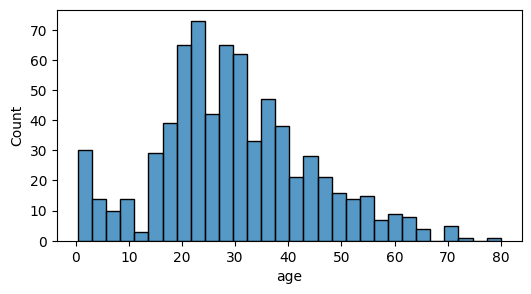

In [15]:
# histplot
plt.figure(figsize=(6,3))
sns.histplot(data=df, x='age', bins=30)
plt.show()

<Figure size 300x300 with 0 Axes>

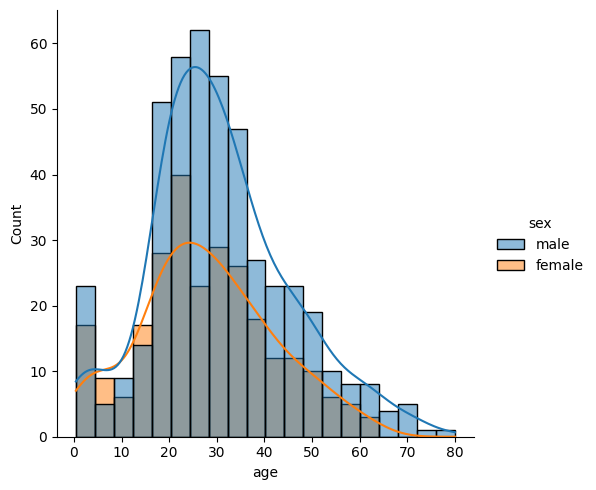

In [ ]:
# displot : Figure-level interface for drawing distribution plots onto a FacetGrid.
# Figure-level 함수(sns.displot, sns.catplot, sns.pairplot 등)는 subplot과 함께 사용 불가
plt.figure(figsize=(3,3))
sns.displot(data=df, x='age', hue='sex', kde=True)
plt.show()
plt.close()

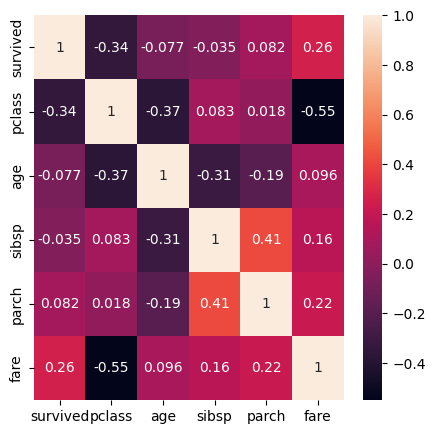

In [ ]:
# Figure-level 함수(sns.displot, sns.catplot, sns.pairplot 등)는 subplot과 함께 사용 불가
# sns.barplot, sns.histplot, sns.countplot, sns.kdeplot 등은 subplot 가능

# jointplot

# heatmap
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(5,5))
corr_mat = df[num_cols].corr()
sns.heatmap(corr_mat, annot=True)
plt.show()

In [6]:
iris = sns.load_dataset('iris')
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

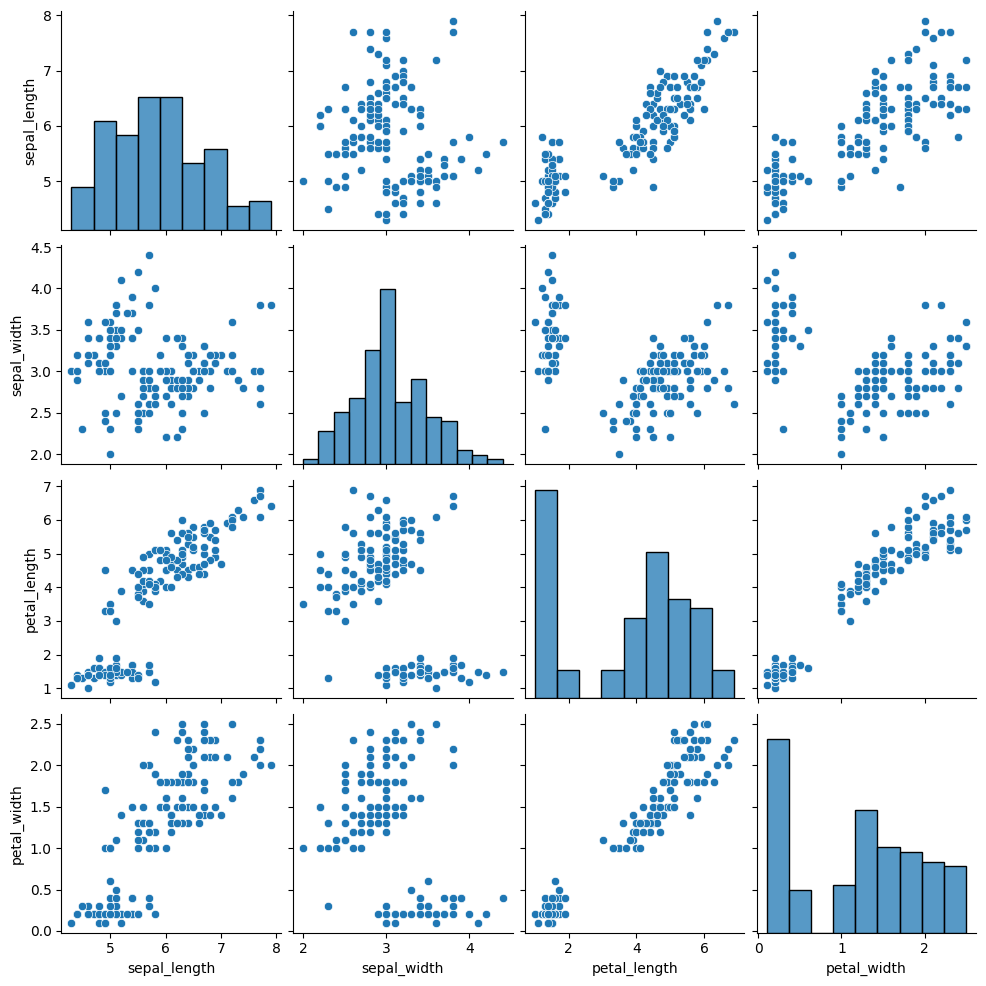

In [7]:
sns.pairplot(iris)

<Axes: xlabel='sepal_length', ylabel='count'>

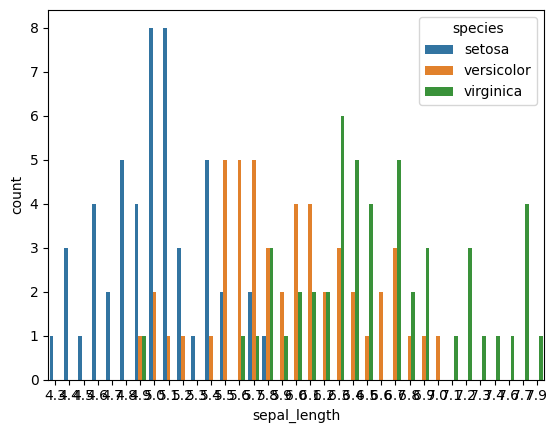

In [8]:
sns.countplot(data=iris, x='sepal_length', hue='species')

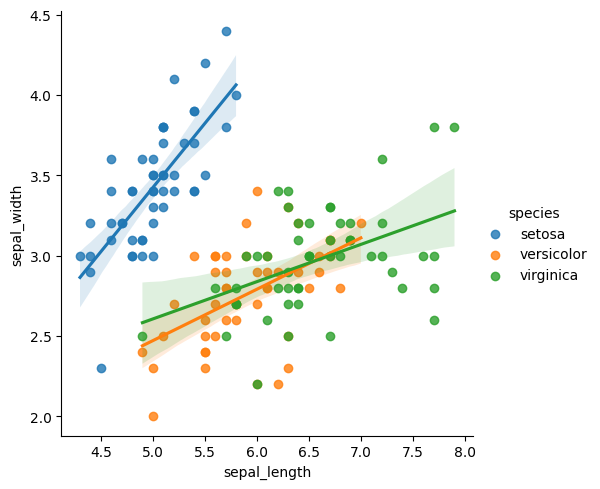

In [9]:
sns.lmplot(data=iris, x='sepal_length', y='sepal_width', hue='species')